In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**IMPORTING KERAS DATASET**

In [2]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(X_test.shape)
print(Y_test.shape)

(10000, 28, 28)
(10000,)


**SHOWING THE IMAGES**

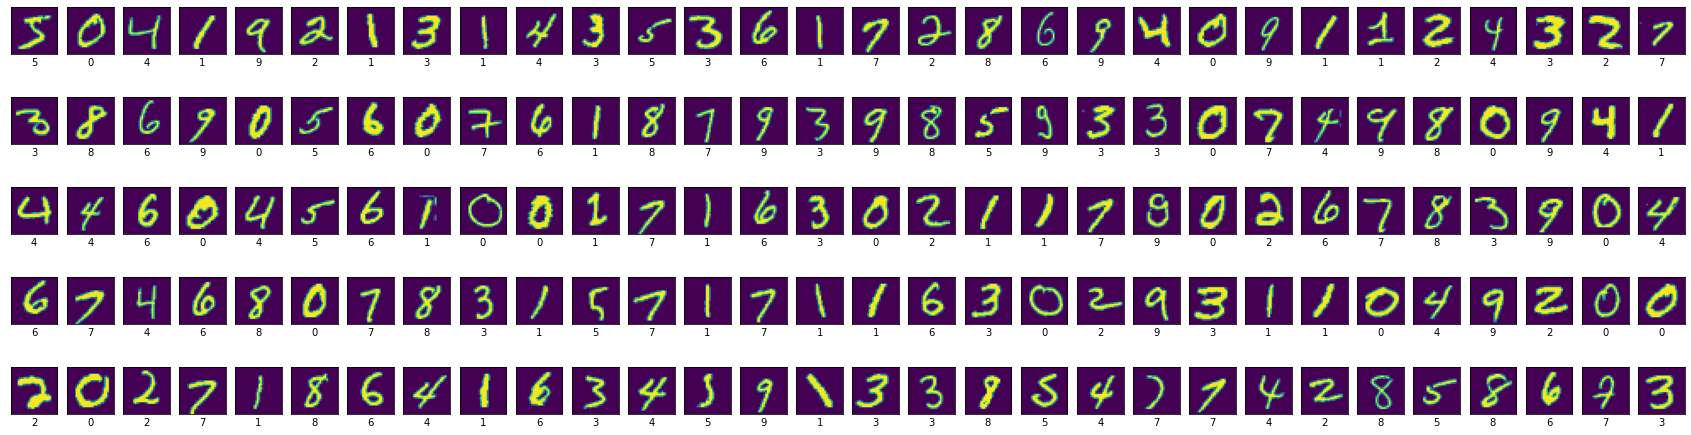

In [5]:
i = 0
plt.figure(figsize=(30,8))

for i in range(150):  
  plt.subplot(5, 30, i+1)
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(Y_train[i])
plt.show()

**RESHAPING THE IMAGES,MAKING SURE SO THAT KERAS CAN ABLE TO READ OUR IMAGES**

In [6]:
X_train = X_train.reshape((60000,28,28))
X_train= X_train.astype('float32') / 255

In [7]:
X_train = tf.expand_dims(X_train, axis=-1)

In [8]:
print(X_train.shape)


(60000, 28, 28, 1)


In [9]:
X_test = X_test.reshape((10000,28,28))
X_test= X_test.astype('float32') / 255

In [10]:
X_test = tf.expand_dims(X_test, axis=-1)

In [11]:
print(X_test.shape)

(10000, 28, 28, 1)


**CATEGORICALLY INCODE THE LABEL**

In [12]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

**CREATING THE MODEL**

In [13]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(28,28,1)), #Input layers
        tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'), #Conv layer consist set of filter and each filter can detect specific pattern
                                                                                  #Using 5x5 filter and 1st layer consist 64 different filter
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #Using maxpooling to reduce the input
                                                       #Applying maxpooling 2x2 means selects the max value from each 2x2 so that output will became half.
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')


])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

**COMPILATION PHASE USING RMSprop**

In [14]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(), #Define how the model update itself
    loss = tf.keras.losses.categorical_crossentropy, #Mesaure the performance on the train data
    metrics = ['accuracy'] #For tracking during the training and testing and in that case we are only looking for the accuracy
                           #which is the number of correctly labled images
)

In [15]:
n = model.fit(x = X_train, y = Y_train, epochs=5, validation_split=0.2, batch_size=64)          # 1 epoch is for one forward pass and one backward pass for all the images
                                                                                               # batch_size is the number of training examples in one frward and one backward pass
                                                                                               # The higher the batch_size the more memory we will need

Epoch 1/5
750/750 [==============================] - 38s 10ms/step - loss: 0.2147 - accuracy: 0.9339 - val_loss: 0.0749 - val_accuracy: 0.9766
Epoch 2/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 3/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 4/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 5/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0251 - accuracy: 0.9923 - val_loss: 0.0384 - val_accuracy: 0.9902


In [16]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9896
0.03193654119968414 0.9896000027656555


**PLOTING THE FIGURE**

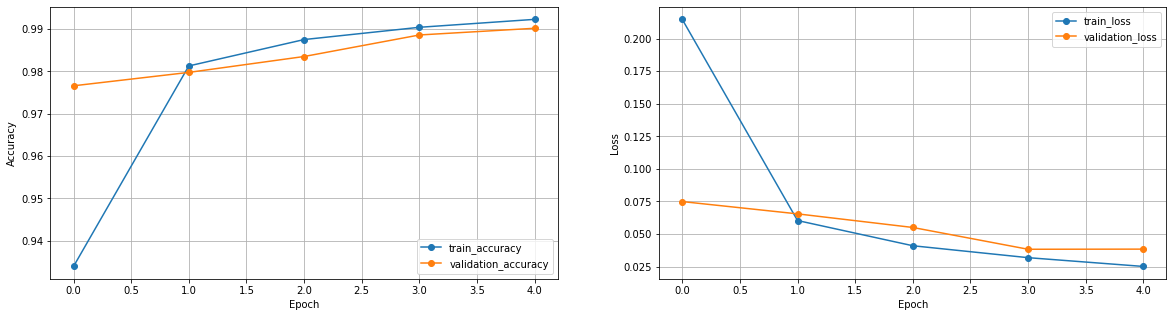

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(n.history['accuracy'],'o-', label='train_accuracy')
plt.plot(n.history['val_accuracy'],'o-', label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(n.history['loss'],'o-', label='train_loss')
plt.plot(n.history['val_loss'],'o-', label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
predictions = model.predict(X_test)

In [19]:
predictions[0]

array([2.6869852e-12, 2.3208846e-09, 9.0252051e-08, 3.0583035e-08,
       1.5508787e-11, 3.0632316e-11, 8.3862207e-16, 9.9999976e-01,
       1.6602669e-12, 1.4030734e-07], dtype=float32)

In [28]:
np.argmax(predictions[0])

7

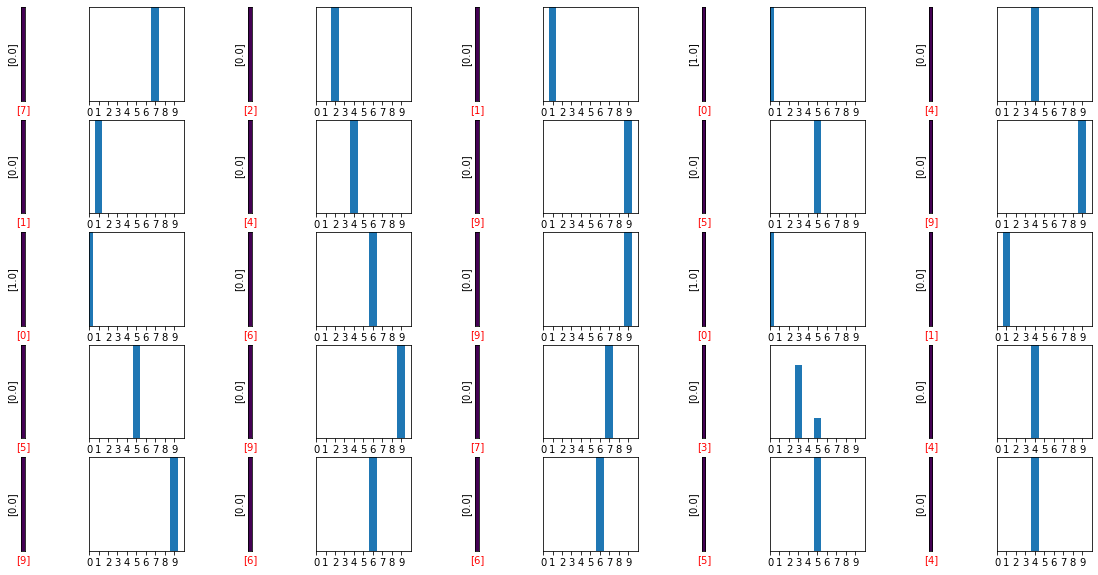

In [44]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i][0])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel([Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='g')
    else:
        plt.xlabel([np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

**COMPILATION PHASE USING ADAM**

In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(), 
    loss = tf.keras.losses.categorical_crossentropy, 
    metrics = ['accuracy'] 
)

In [21]:
A = model.fit(x = X_train, y = Y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0410 - val_accuracy: 0.9879
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0414 - val_accuracy: 0.9886
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0434 - val_accuracy: 0.9898
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0436 - val_accuracy: 0.9897


In [22]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0353 - accuracy: 0.9903
0.03534344211220741 0.9902999997138977


**PLOTING FIGURE**

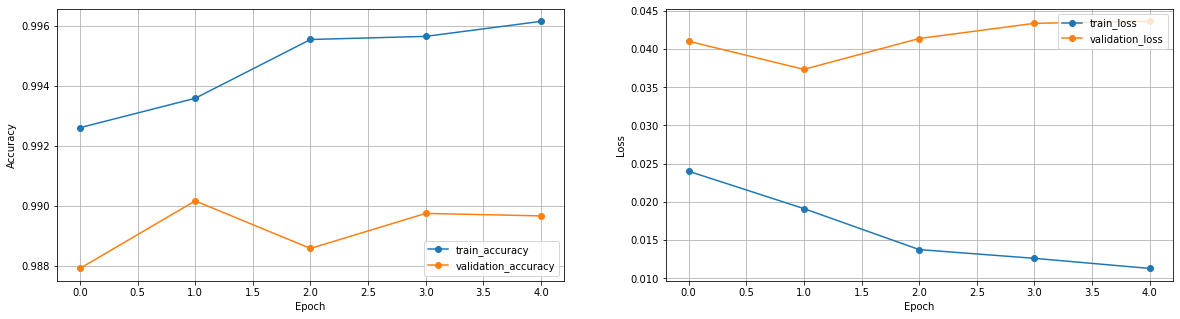

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(A.history['accuracy'],'o-', label='train_accuracy')
plt.plot(A.history['val_accuracy'],'o-', label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(A.history['loss'],'o-', label='train_loss')
plt.plot(A.history['val_loss'],'o-', label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [46]:
predictions = model.predict(X_test)

In [47]:
predictions[1]

array([3.3862944e-11, 2.7242148e-11, 1.0000000e+00, 5.7942691e-13,
       8.2630670e-18, 6.1949487e-15, 1.9169564e-13, 5.5517182e-15,
       2.9536503e-12, 7.4594760e-19], dtype=float32)

In [50]:
np.argmax(predictions[1])

2

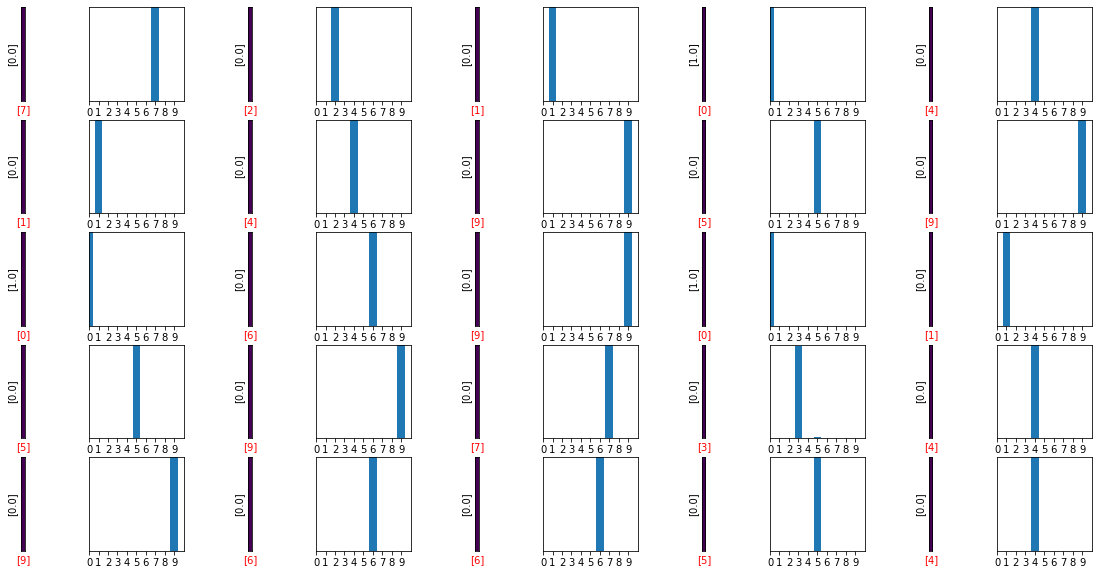

In [53]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i][0])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel([Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(np.argmax(predictions[i]), color='g')
    else:
        plt.xlabel([np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

**COMPILATION PHASE USING SGD**

In [24]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(), 
    loss = tf.keras.losses.categorical_crossentropy, 
    metrics = ['accuracy'] 
)

In [25]:
S = model.fit(x = X_train, y = Y_train, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0345 - val_accuracy: 0.9909
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0345 - val_accuracy: 0.9916
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0349 - val_accuracy: 0.9919
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0349 - val_accuracy: 0.9921
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0354 - val_accuracy: 0.9918
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0354 - val_accuracy: 0.9921
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0357 - val_accuracy: 0.9921
Epoch 

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0263 - accuracy: 0.9932
0.026311147958040237 0.9932000041007996


**PLOTING THE FIGURE**

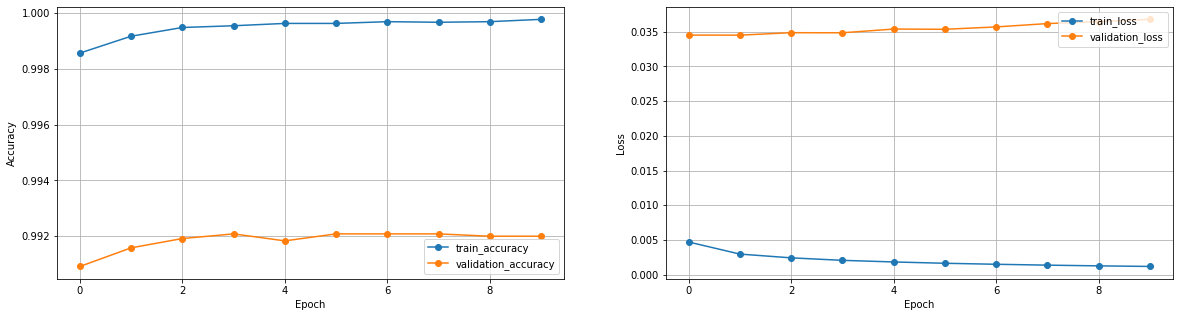

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(S.history['accuracy'],'o-', label='train_accuracy')
plt.plot(S.history['val_accuracy'],'o-', label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(S.history['loss'],'o-', label='train_loss')
plt.plot(S.history['val_loss'],'o-', label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()